## Melbourne House Prices

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Part 1:

##### Load the melb_data.csv data source (Melbourne housing prices) into you project and get familiar with the data

In [2]:
df = pd.read_csv('melb_data.csv',index_col=0)

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

##### Are there any special pre-processing that need to be done?

We've already seen that the dataset has A LOT of missing values, so for the time being, we'll just drop the rows with missing values

In [6]:
new_df = df.copy()
new_df = new_df.dropna()
# For the meantime, we'll drop all the NaN values for a clean dataset

Lets start filtering our dataset in a way we can apply some analysis on it

* First, lets remove all the features which areant a numerical value
* Next, we'll remove any row which might affect our analysis drastically

In [7]:
no_strings = new_df.drop(['Suburb','Address','Method','SellerG','Date'
                          ,'Regionname','CouncilArea','Type'],axis=1)
no_strings = no_strings.drop(no_strings[no_strings.YearBuilt<1800].index)
no_strings = no_strings.drop(no_strings[no_strings.BuildingArea>2000].index)
no_strings = no_strings.drop(no_strings[no_strings.Landsize>24000].index)

In [8]:
no_strings.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


##### Build a model to predict the price of a house you haven't seen before? What algorithm do you choose?
##### How do you measure the performance of the algorithms you chose in 3? Compare a few metrics and show the diﬀerences. Compare a few methods to show the diﬀerence
##### Would diﬀerent parametrs or algorithms to (3) provide diﬀerent results? compare some of the algorithms

In [35]:
Y = no_strings.Price
x = X = no_strings.drop(['Price'],axis=1)

In [24]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


Since there's quite a difference between the variance of the values, we'll normalize them.
That way, we can fit them.

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

Now that we've scaled our data and split it into training and testing sets.
Time to check which model will best suit the prediction.

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)
ypred = reg.predict(xtest)
acc_score = reg.score(xtest,ytest)
print('LINEAR REGRESSION:\n')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(ytest,ypred))))
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:

RMSE score: 404825.6560414828
Accuracy Score is: 0.6074169287613587


In [28]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
acc_score = rf.score(xtest,ytest)
print('RANDOM FOREST:\n')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(ytest,ypred))))
print('Accuracy Score is: {}'.format(acc_score))

RANDOM FOREST:

RMSE score: 276976.2005594508
Accuracy Score is: 0.8162275443684579


In [29]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)
acc_score = dtr.score(xtest,ytest)
print('DECISION TREE:\n')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(ytest,ypred))))
print('Accuracy Score is: {}'.format(acc_score))

DECISION TREE:

RMSE score: 399171.3578591827
Accuracy Score is: 0.6183069481958228


We can see that our Random Forest Regressor has given us the best prediction for our model, with an accuracy score of 81%, proving our model is quite efficient rather than the other models.

##### Do analysis of the most signiﬁcant factors that have impact on price, and draw dependecy graphs

In order to check which features are the most significant, we'll check the correlation between each feature and our desired variable: Price

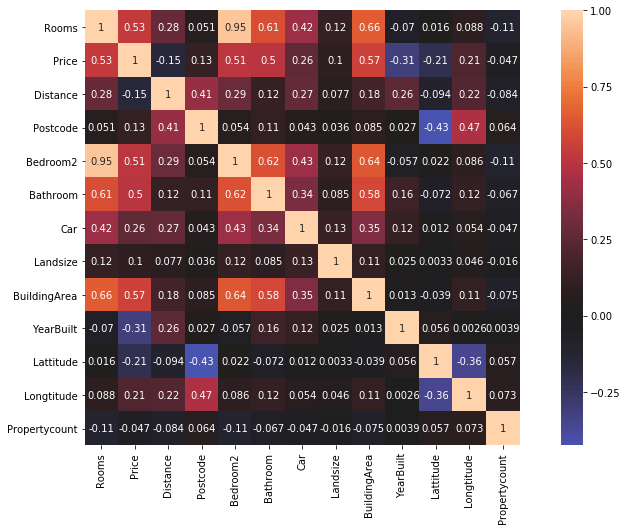

In [38]:
no_strings_corr = no_strings._get_numeric_data()
plt.figure(figsize=(15,8))
sb.heatmap(no_strings_corr.corr(),annot=True,center=0,square=True)

Now that we can see the correlation, lets plot each connection

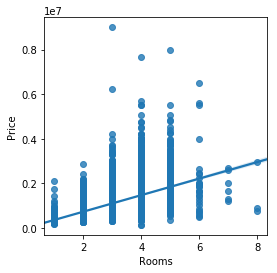

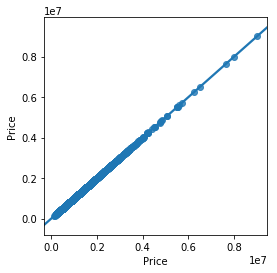

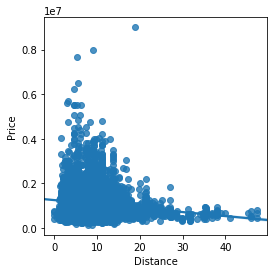

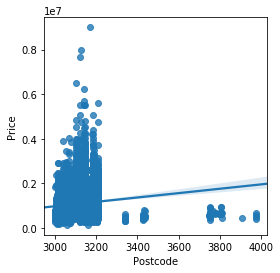

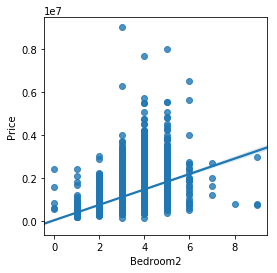

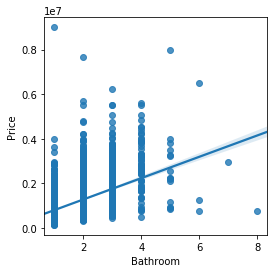

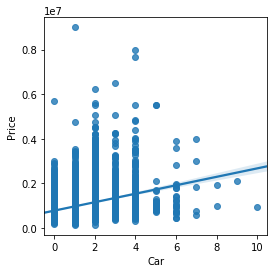

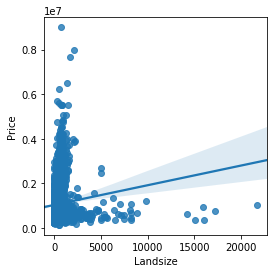

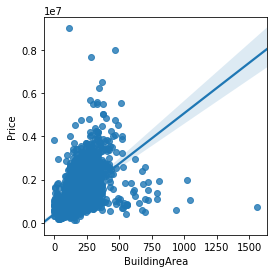

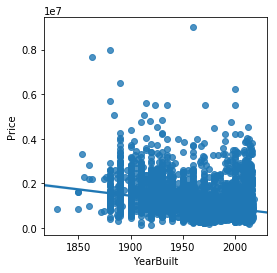

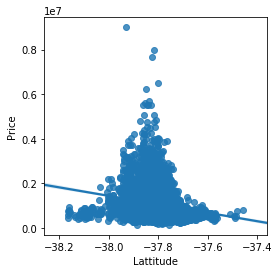

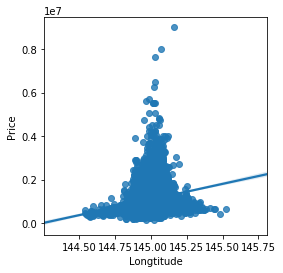

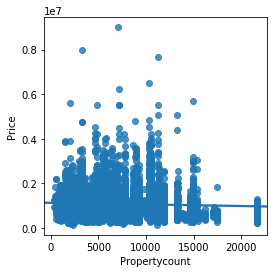

In [39]:
for i in no_strings:
    plt.figure(figsize=(4,4))
    sb.regplot(data=no_strings,x=i,y='Price')
    plt.show()

##### Would you consider diﬀerent approaches to missing data (as the ones you used in (2))? What are the options (ﬁllna, dropna, imputer)? Compare the accuracy with those approaches

Since we've already tried running our model after dropping all the missing rows in our dataset, lets take a different approach.
By filling the missing values with either 0 or the mean of the column

In [41]:
even_newer_df = df.copy()

In [47]:
even_newer_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      6163
Lattitude           0
Longtitude          0
Regionname          1
Propertycount       0
dtype: int64

First, lets try to fill the missing values with the mean of each column

In [48]:
mean_df = even_newer_df.fillna(even_newer_df.mean())

In [49]:
mean_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      6163
Lattitude           0
Longtitude          0
Regionname          1
Propertycount       0
dtype: int64

We can see that there are still a few columns with missing values, that is because those columns are of type strings and therefore do not have a mean value. So unfortunately, we'll drop them

In [50]:
mean_df = mean_df.drop(['CouncilArea','Regionname'],axis=1)

In [53]:
mean_nostrings = mean_df.drop(['Suburb','Address','Method','SellerG','Date','Type'],axis=1)
mean_nostrings = mean_nostrings.drop(mean_nostrings[mean_nostrings.YearBuilt<1800].index)
mean_nostrings = mean_nostrings.drop(mean_nostrings[mean_nostrings.BuildingArea>2000].index)
mean_nostrings = mean_nostrings.drop(mean_nostrings[mean_nostrings.Landsize>24000].index)

In [55]:
mean_nostrings.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.220219,1965.879996,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.220219,1965.879996,-37.7969,144.9969,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


In [56]:
meanY = mean_nostrings.Price
meanX = mean_nostrings.drop(['Price'],axis=1)
mean_minmax = MinMaxScaler()
meanX = mean_minmax.fit_transform(meanX) 

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(meanX,meanY,test_size=0.2,random_state=0)

In [59]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)
ypred = reg.predict(xtest)
acc_score = reg.score(xtest,ytest)
print('LINEAR REGRESSION:\n')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(ytest,ypred))))
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:

RMSE score: 459328.24255007005
Accuracy Score is: 0.5138595552065752


In [60]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
acc_score = rf.score(xtest,ytest)
print('RANDOM FOREST:\n')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(ytest,ypred))))
print('Accuracy Score is: {}'.format(acc_score))

RANDOM FOREST:

RMSE score: 327730.1751694901
Accuracy Score is: 0.7525153227983903


In [61]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)
acc_score = dtr.score(xtest,ytest)
print('DECISION TREE:\n')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(ytest,ypred))))
print('Accuracy Score is: {}'.format(acc_score))

DECISION TREE:

RMSE score: 427612.285947567
Accuracy Score is: 0.5786763826700718


We can see that after filling the missing values with the mean of each column our accuracy was a tad lower, but we need to keep in mind that we are working on a dataset three times the size of our original dataset

### Part 2:

* Build a model to predict if an apartment has less than 3 Rooms or not. What algorithm do you choose
* How do you measure performance? Show the diﬀerence with diﬀerent CV models
* Evaluate the result with a few diﬀerent algorithms, do you see a diﬀerence

For predicting whether a house has 3 rooms or not, we'll use our new_df dataset.

In order to predict whether a house has 3 rooms or not we first need to prepare our data. That means, every row where the amount of houses is not 3 will be 0 and 1 if it is. Since our labels are known we are using supervised learning and thus, we will use Rergression algorithms

In [68]:
new_df['is3Rooms'] = np.where(new_df['Rooms']==3,1,0)
is3Rooms = new_df.drop('Rooms',axis=1)
is3Rooms = is3Rooms.drop(['Suburb','Date','Address','Type','Method','SellerG','CouncilArea','Regionname',],axis=1)
is3Rooms.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,is3Rooms
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,1
6,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,0
11,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,1
14,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,0


In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(is3Rooms.iloc[:,:-1]
                                             ,is3Rooms.iloc[:,-1],random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
acc = clf.score(xtest,ytest)
print('Logistic Regression Accuracy: {}'.format(acc))

Logistic Regression Accuracy: 0.5816655907036798


In [72]:
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(xtrain,ytrain)
acc_forest = clf_forest.score(xtest,ytest)
print('Random Forest Accuracy: {}'.format(acc_forest))

Random Forest Accuracy: 0.9554551323434474


We got a really nice accuracy score, above 95% accuracy.
Now lets check if there's any room for improvement.
We'll use GridSearchCV to boost our RandomForestClassifier.

In [77]:
from sklearn.model_selection import GridSearchCV
params = [{'max_depth':range(2,10),'n_estimators':range(2,8,2),'max_features':range(1,12)}]
clf_g = GridSearchCV(RandomForestClassifier(random_state=0),params)
clf_g.fit(xtrain,ytrain)

print('Best score for train data:', clf_g.best_score_)
print('Best depth:',clf_g.best_estimator_.max_depth)
print('Best n trees:',clf_g.best_estimator_.n_estimators)
print('Best n features:',clf_g.best_estimator_.max_features)
print('Score for test data:',clf_g.score(xtest, ytest))

Best score for train data: 0.9565310953303207
Best depth: 3
Best n trees: 6
Best n features: 10
Score for test data: 0.9644932214331827


##### Can you see what are the signiﬁcant features that impact the # of rooms prediction

In order for us to see which features affect our regression the most, we need to calculate the coefficient of every feature.

In [78]:
coef = list(sorted(zip(xtrain.columns,abs(clf.coef_[0])),key=lambda x: -x[1]))
coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
print('Coefficience for every feature:\n')
print(coef_table)

Coefficience for every feature:

       Attributes             Coefficient
0        Landsize   8.290765854868791e-05
1        Postcode   4.376879461552474e-05
2   Propertycount  2.1910969069465686e-05
3       YearBuilt   1.968046200242201e-05
4    BuildingArea  1.5063096200829944e-05
5        Distance   4.376138514839628e-06
6      Longtitude    6.54354631243717e-07
7             Car  4.1537041448548764e-07
8        Bedroom2   3.944337998573164e-07
9        Bathroom  2.8471425052338597e-07
10      Lattitude   2.079410056736943e-07
11          Price  1.4751960185385926e-09
